## RFM Customer Segmentation 

# Import and discover data

In [1]:
import pandas as pd
transaction = pd.read_csv('transaction_data.csv')   
transaction.head()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
0,2375,26984851472,1,1004906,1,1.39,364,-0.60,1631,1,0.0,0.0
1,2375,26984851472,1,1033142,1,0.82,364,0.00,1631,1,0.0,0.0
2,2375,26984851472,1,1036325,1,0.99,364,-0.30,1631,1,0.0,0.0
3,2375,26984851472,1,1082185,1,1.21,364,0.00,1631,1,0.0,0.0
4,2375,26984851472,1,8160430,1,1.50,364,-0.39,1631,1,0.0,0.0


In [2]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2595732 entries, 0 to 2595731
Data columns (total 12 columns):
 #   Column             Dtype  
---  ------             -----  
 0   household_key      int64  
 1   BASKET_ID          int64  
 2   DAY                int64  
 3   PRODUCT_ID         int64  
 4   QUANTITY           int64  
 5   SALES_VALUE        float64
 6   STORE_ID           int64  
 7   RETAIL_DISC        float64
 8   TRANS_TIME         int64  
 9   WEEK_NO            int64  
 10  COUPON_DISC        float64
 11  COUPON_MATCH_DISC  float64
dtypes: float64(4), int64(8)
memory usage: 237.6 MB


In [3]:
transaction.isnull().sum()

household_key        0
BASKET_ID            0
DAY                  0
PRODUCT_ID           0
QUANTITY             0
SALES_VALUE          0
STORE_ID             0
RETAIL_DISC          0
TRANS_TIME           0
WEEK_NO              0
COUPON_DISC          0
COUPON_MATCH_DISC    0
dtype: int64

## Statistic result

In [6]:
pd.set_option('display.float_format', '{:.2f}'.format)
transaction.describe()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
count,2595732.00,2595732.00,2595732.00,2595732.00,2595732.00,2595732.00,2595732.00,2595732.00,2595732.00,2595732.00,2595732.00,2595732.00
mean,1271.95,34026199138.89,388.76,2891435.16,100.43,3.10,3142.67,-0.54,1561.59,56.22,-0.02,-0.00
std,726.07,4711649037.86,189.72,3837403.69,1153.44,4.18,8937.11,1.25,399.84,27.10,0.22,0.04
min,1.00,26984851472.00,1.00,25671.00,0.00,0.00,1.00,-180.00,0.00,1.00,-55.93,-7.70
25%,656.00,30408046256.00,229.00,917459.00,1.00,1.29,330.00,-0.69,1308.00,33.00,0.00,0.00
50%,1272.00,32760806548.00,390.00,1028816.00,1.00,2.00,372.00,-0.01,1613.00,56.00,0.00,0.00
75%,1913.00,40126853628.00,553.00,1133018.00,1.00,3.49,422.00,0.00,1843.00,80.00,0.00,0.00
max,2500.00,42305362535.00,711.00,18316298.00,89638.00,840.00,34280.00,3.99,2359.00,102.00,0.00,0.00


In [7]:
transaction.nunique()

household_key          2500
BASKET_ID            276484
DAY                     711
PRODUCT_ID            92339
QUANTITY              11746
SALES_VALUE            5502
STORE_ID                582
RETAIL_DISC            2414
TRANS_TIME             1440
WEEK_NO                 102
COUPON_DISC             415
COUPON_MATCH_DISC        80
dtype: int64

array([[<Axes: title={'center': 'QUANTITY'}>,
        <Axes: title={'center': 'SALES_VALUE'}>],
       [<Axes: title={'center': 'TRANS_TIME'}>,
        <Axes: title={'center': 'WEEK_NO'}>],
       [<Axes: title={'center': 'COUPON_DISC'}>,
        <Axes: title={'center': 'COUPON_MATCH_DISC'}>]], dtype=object)

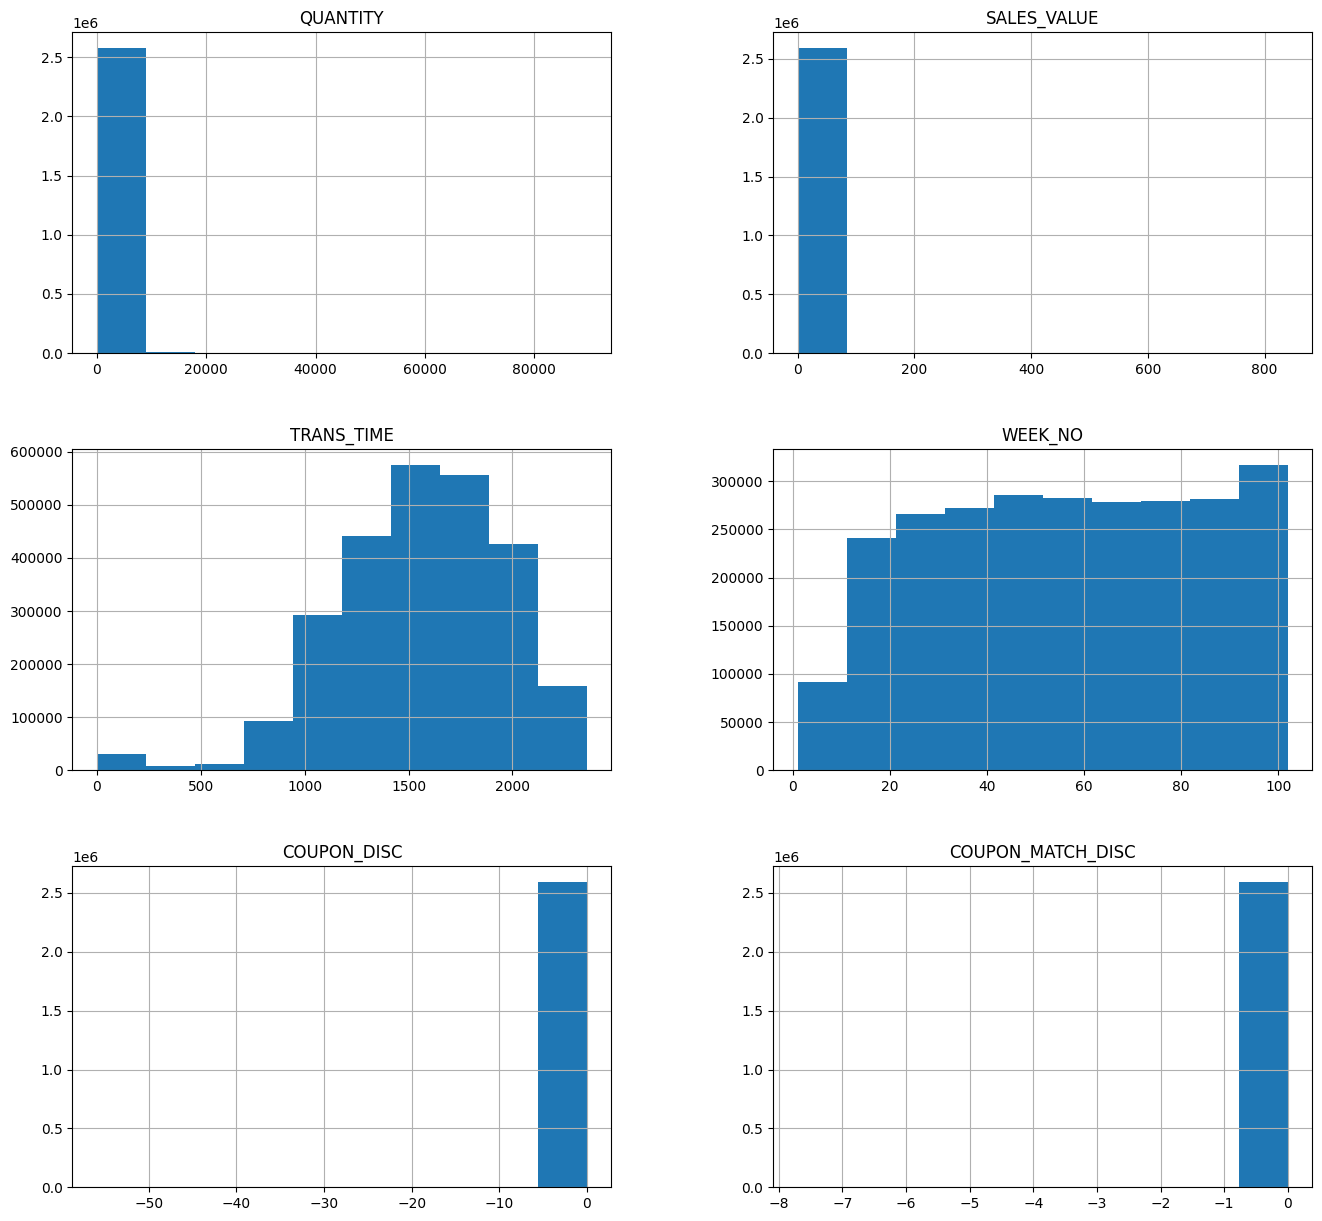

In [8]:
transaction[["QUANTITY","SALES_VALUE","TRANS_TIME","WEEK_NO","COUPON_DISC","COUPON_MATCH_DISC"]].hist(figsize=(16,15))  

# RFM Calculation

## Calculate Recency Frequency and Monetary

In [9]:
trans_valid= transaction.loc[transaction['SALES_VALUE']>0]

In [10]:
datamart = trans_valid.groupby(['household_key']).agg({
'DAY': lambda x: (712 - x.max()),
'BASKET_ID': 'nunique',
'SALES_VALUE': 'sum'})
# Rename columns for easier interpretation
datamart.rename(columns = {'DAY': 'Recency(Days)',
'BASKET_ID': 'Frequency',
'SALES_VALUE': 'Monetary'}, inplace=True)
datamart

,Recency(Days),Frequency,Monetary
household_key,,,
1,6,85,4330.16
2,44,45,1954.34
3,9,47,2653.21
4,85,30,1200.11
5,9,40,779.06
...,...,...,...
2496,29,63,4339.66
2497,12,221,7111.98
2498,2,172,2601.60


## Scoring

In [11]:
r_labels = range(4, 0,-1)
r_quartiles = pd.qcut(datamart['Recency(Days)'], 4, labels = r_labels)
datamart = datamart.assign(R = r_quartiles.values)
datamart 

,Recency(Days),Frequency,Monetary,R
household_key,,,,
1,6,85,4330.16,3
2,44,45,1954.34,1
3,9,47,2653.21,2
4,85,30,1200.11,1
5,9,40,779.06,2
...,...,...,...,...
2496,29,63,4339.66,1
2497,12,221,7111.98,2
2498,2,172,2601.60,4


In [12]:
f_labels = range(1,5)
m_labels = range(1,5)
f_quartiles = pd.qcut(datamart['Frequency'], 4, labels = f_labels)
m_quartiles = pd.qcut(datamart['Monetary'], 4, labels = m_labels)
datamart = datamart.assign(F = f_quartiles.values)
datamart = datamart.assign(M = m_quartiles.values)
datamart

,Recency(Days),Frequency,Monetary,R,F,M
household_key,,,,,,
1,6,85,4330.16,3,3,3
2,44,45,1954.34,1,2,2
3,9,47,2653.21,2,2,3
4,85,30,1200.11,1,1,2
5,9,40,779.06,2,2,1
...,...,...,...,...,...,...
2496,29,63,4339.66,1,2,3
2497,12,221,7111.98,2,4,4
2498,2,172,2601.60,4,4,3


In [16]:
def join_rfm(x): return str(x['R']) + str(x['F']) + str(x['M'])
datamart['RFM_Segment'] = datamart.apply(join_rfm, axis=1)
datamart['RFM_Score'] = datamart[['R','F','M']].sum(axis=1)
datamart.head(20)

,Recency(Days),Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score
household_key,,,,,,,,
1,6,85,4330.16,3,3,3,333,9
2,44,45,1954.34,1,2,2,122,5
3,9,47,2653.21,2,2,3,223,7
4,85,30,1200.11,1,1,2,112,4
5,9,40,779.06,2,2,1,221,5
6,5,249,5996.16,3,4,4,344,11
7,3,59,3400.05,3,2,3,323,8
8,6,113,5534.97,3,3,4,334,10
9,23,20,797.42,1,1,1,111,3


## Count number of customers in each group

In [20]:
datamart.groupby('RFM_Segment').size().sort_values(ascending=False)[:10]
# top 10 group 

RFM_Segment
111    277
444    225
344    157
333    105
211    101
222     99
433     90
322     79
122     69
223     65
dtype: int64

In [21]:
pd.reset_option('display.float_format')
datamart.groupby('RFM_Score').agg({'Recency(Days)': 'mean',
                                    'Frequency': 'mean',
                                    'Monetary': ['mean','count'] }).round(1)

Recency(Days) Frequency Monetary      
                   mean      mean     mean count
RFM_Score                                       
3                 124.8      16.5    372.6   277
4                  42.3      30.0    763.6   207
5                  29.0      41.0   1097.4   213
6                  17.6      52.3   1452.3   260
7                  15.7      71.6   2041.1   265
8                  12.3      94.7   2666.5   269
9                   9.9     119.3   3616.5   253
10                  4.6     150.0   4575.6   262
11                  3.2     218.4   6499.4   269
12                  1.4     309.8   9175.6   225

# Segment by total score

In [22]:
def segment_me(df):
    if df['RFM_Score'] >= 9:
        return 'Gold'
    elif (df['RFM_Score'] >= 5) and (df['RFM_Score'] < 9):
        return 'Silver'
    else:
        return 'Bronze'
      
datamart['General_Segment'] = datamart.apply(segment_me, axis=1)
segments = datamart.groupby('General_Segment').agg({'Recency(Days)': 'mean',
                                         'Frequency': 'mean',
                                         'Monetary': ['mean','count']}).round(1).sort_values(by=('Recency(Days)', 'mean'))
segments

Recency(Days) Frequency Monetary      
                         mean      mean     mean count
General_Segment                                       
Gold                      4.8     196.2   5873.8  1009
Silver                   18.1      66.3   1856.5  1007
Bronze                   89.5      22.3    539.9   484

## Visualization on 3D plot

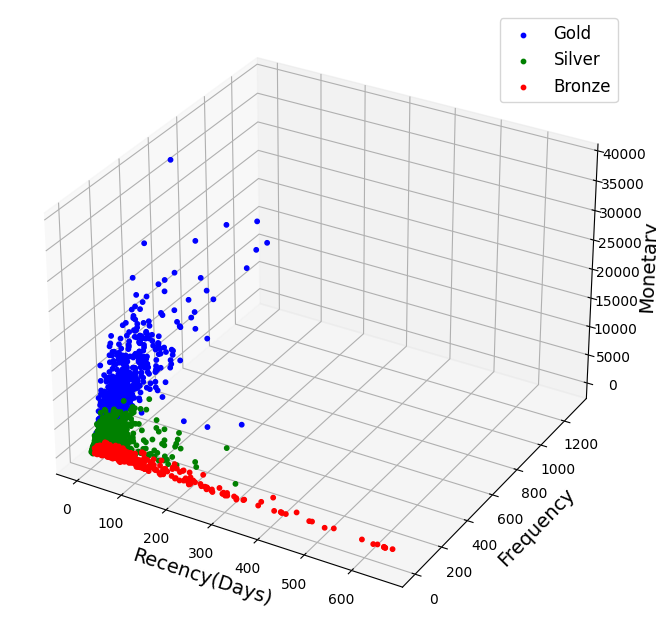

In [33]:
def segment_nu(df):
    if df['RFM_Score'] >= 9:
        return 1
    elif (df['RFM_Score'] >= 5) and (df['RFM_Score'] < 9):
        return 2
    else:
        return 0
      
datamart['Cluster'] = datamart.apply(segment_nu, axis=1)
datamart

rfm = datamart
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 8))
dx = fig.add_subplot(111, projection='3d')
colors = ['red', 'blue', 'green']


cluster_order = [1, 2, 0]

for cluster in cluster_order:
    dx.scatter(rfm[rfm.Cluster == cluster]["Recency(Days)"], 
               rfm[rfm.Cluster == cluster].Frequency, 
               rfm[rfm.Cluster == cluster].Monetary, 
               c=colors[cluster], 
               label='Cluster ' + str(cluster), 
               s=10, alpha=1.0)

dx.set_xlabel('Recency(Days)', fontsize=14)
dx.set_ylabel('Frequency', fontsize=14)
dx.set_zlabel('Monetary', fontsize=14)


custom_legend_labels = ['Gold', 'Silver', 'Bronze']


dx.legend(custom_legend_labels, fontsize=12)

plt.show()

# Segment by K-means Cluster 

-Symmetric distribution of variables (not skewed)

-Variables with same average values

-Variables with same variance


## Check distribution, mean and std

In [25]:
datamart.describe()

,Recency(Days),Frequency,Monetary,RFM_Score,Cluster
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,26.576000,110.216800,3222.985232,7.538800,1.209200
std,62.791673,115.271537,3349.026076,2.846566,0.743543
min,1.000000,1.000000,8.170000,3.000000,0.000000
25%,2.000000,38.000000,970.740000,5.000000,1.000000
50%,7.000000,78.000000,2157.750000,8.000000,1.000000
75%,21.000000,142.000000,4413.320000,10.000000,2.000000
max,658.000000,1298.000000,38319.790000,12.000000,2.000000


array([[<Axes: title={'center': 'Recency(Days)'}>,
        <Axes: title={'center': 'Frequency'}>],
       [<Axes: title={'center': 'Monetary'}>, <Axes: >]], dtype=object)

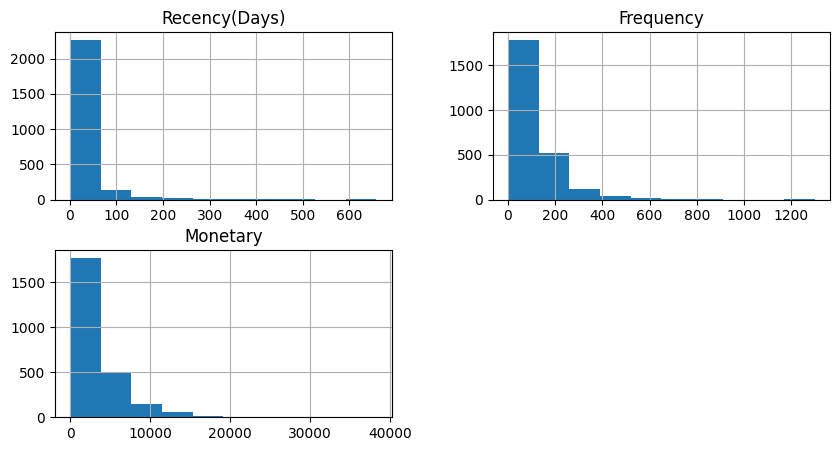

In [26]:
datamart_rfm = datamart[['Recency(Days)','Frequency','Monetary']]
datamart_rfm.hist(figsize=(10,5))

## Data pre-processing

### Normalize the variables

In [27]:
# Unskew the data
import numpy as np
datamart_log = np.log(datamart_rfm)
# Normalize the variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(datamart_log)
# Store for clustering
datamart_normalized = scaler.transform(datamart_log)
print('mean: ', datamart_normalized.mean(axis=0).round(2))
print('std: ', datamart_normalized.std(axis=0).round(2))

mean:  [-0.  0. -0.]
std:  [1. 1. 1.]


array([[<Axes: title={'center': 'Recency(Days)'}>,
        <Axes: title={'center': 'Frequency'}>],
       [<Axes: title={'center': 'Monetary'}>, <Axes: >]], dtype=object)

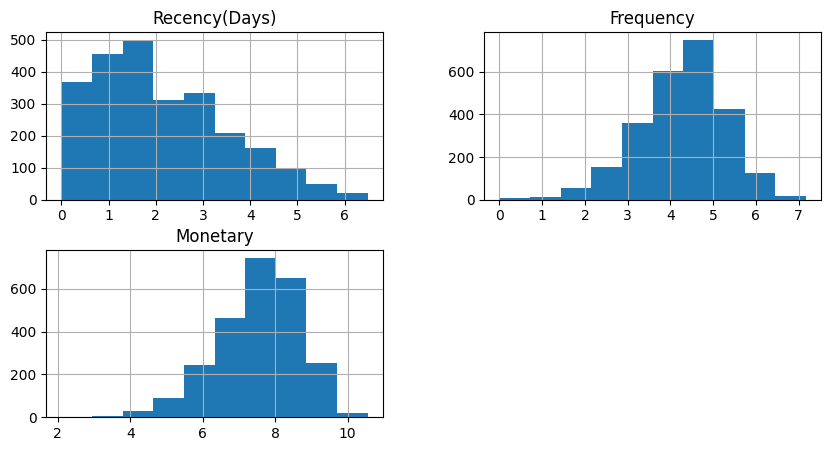

In [300]:
datamart_log.hist(figsize=(10,5))

## Define the number of clusters

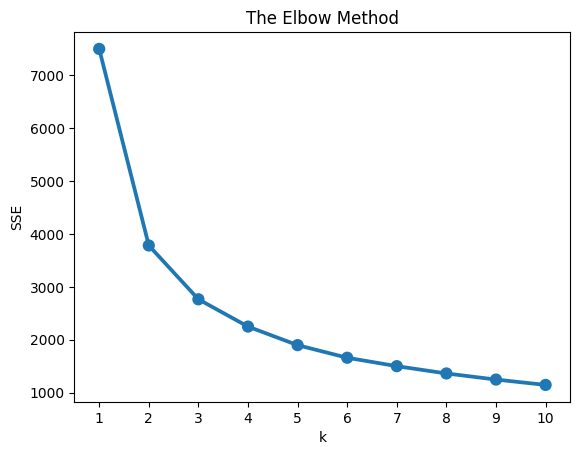

In [28]:
# define the number of clusters
# Visual methods - elbow criterion
# Import key libraries
from sklearn.cluster import KMeans
import seaborn as sns
from matplotlib import pyplot as plt
# Fit KMeans and calculate SSE for each *k*
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=1, n_init=10)
    kmeans.fit(datamart_normalized)
    sse[k] = kmeans.inertia_
# sum of squared distances to closest cluster center
# Plot SSE for each *k*
plt.title('The Elbow Method')
plt.xlabel('k'); plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

### Clusters =2

In [29]:
# Import package
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=1, n_init=10)
# Compute k-means clustering on pre-processed data
kmeans.fit(datamart_normalized)
# Extract cluster labels from labels_attribute
cluster_labels = kmeans.labels_
# Create a cluster label column in the original DataFrame
datamart_rfm_k2 = datamart_rfm.assign(Cluster = cluster_labels)
# Calculate average RFM values and size for each cluster
datamart_rfm_k2.groupby(['Cluster']).agg({'Recency(Days)': 'mean',
                                          'Frequency': 'mean',
                                          'Monetary': ['mean','count'],}).round(0)

Recency(Days) Frequency Monetary      
                 mean      mean     mean count
Cluster                                       
0                 7.0     155.0   4606.0  1571
1                59.0      34.0    885.0   929

### Clusters =3

In [30]:
# Import package
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=1, n_init=10)
# Compute k-means clustering on pre-processed data
kmeans.fit(datamart_normalized)
# Extract cluster labels from labels_attribute
cluster_labels = kmeans.labels_
# Create a cluster label column in the original DataFrame
datamart_rfm_k3 = datamart_rfm.assign(Cluster = cluster_labels)
# Calculate average RFM values and size for each cluster
rfm_k3 = datamart_rfm_k3.groupby(['Cluster']).agg({'Recency(Days)': 'mean',
                                          'Frequency': 'mean',
                                          'Monetary': ['mean','count'],}).round(0).sort_values(by=('Recency(Days)', 'mean'))

rfm_k3

Recency(Days) Frequency Monetary      
                 mean      mean     mean count
Cluster                                       
1                 4.0     201.0   5987.0   960
2                18.0      67.0   1939.0  1081
0                94.0      20.0    465.0   459

In [304]:
def segment_me(df):
    if df['Cluster'] == 1:
        return 'Gold'
    elif df['Cluster'] == 2:
        return 'Silver'
    else:
        return 'Bronze'
      
datamart_rfm_k3['General_Segment'] = datamart_rfm_k3.apply(segment_me, axis=1)
datamart_rfm_k3

,Recency(Days),Frequency,Monetary,Cluster,General_Segment
household_key,,,,,
1,6,85,4330.16,1,Gold
2,44,45,1954.34,2,Silver
3,9,47,2653.21,2,Silver
4,85,30,1200.11,0,Bronze
5,9,40,779.06,2,Silver
...,...,...,...,...,...
2496,29,63,4339.66,2,Silver
2497,12,221,7111.98,1,Gold
2498,2,172,2601.60,1,Gold


### Visualization on 3D plot

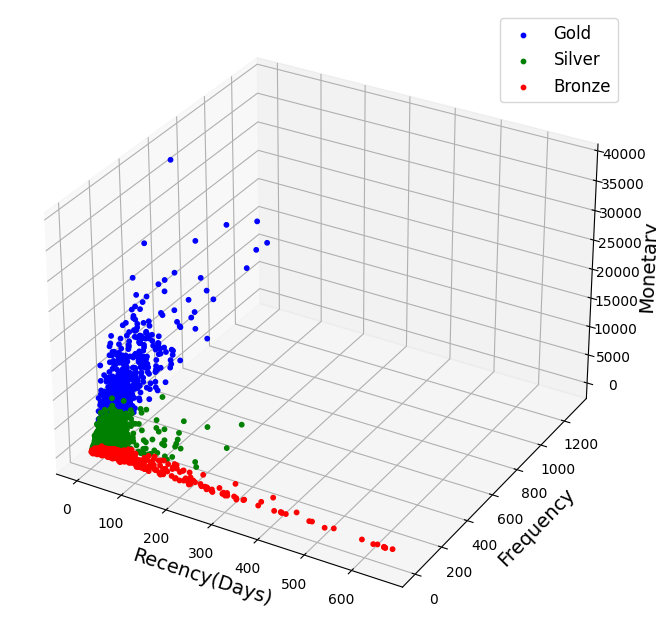

In [36]:
rfm = datamart_rfm_k3 
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,8))
dx = fig.add_subplot(111, projection='3d')
colors = ['red', 'blue', 'green']

# 定义Cluster的顺序
cluster_order = [1, 2, 0]

for cluster in cluster_order:
    dx.scatter(rfm[rfm.Cluster == cluster]["Recency(Days)"], 
               rfm[rfm.Cluster == cluster].Frequency, 
               rfm[rfm.Cluster == cluster].Monetary, 
               c=colors[cluster], 
               label='Cluster ' + str(cluster), 
               s=10, alpha=1.0)

dx.set_xlabel('Recency(Days)', fontsize=14)
dx.set_ylabel('Frequency', fontsize=14)
dx.set_zlabel('Monetary', fontsize=14)

# 自定义图例标签
custom_legend_labels = ['Gold', 'Silver', 'Bronze']

# 添加自定义图例
dx.legend(custom_legend_labels, fontsize=12)

plt.show()

Segment by total score and K-means Cluster have similar results. 

Based on this data, we can make the following general observations:

- "Gold" customers are high-value customers who have made recent, frequent, and high-value purchases.
- "Bronze" customers are lower-value customers with less recent, less frequent, and lower-value purchases.
- "Silver" customers fall between these two extremes in terms of Recency, Frequency, and Monetary values.

This information is valuable for understanding and segmenting customers based on their behavior and can be used to tailor marketing strategies and customer service for each segment.